## Codigo fuente 
#### Se asume que se tinene instalado el CV2 lo cual no es mi caso, y procedo en la siguiente linea a instalarlo

In [7]:
!pip install opencv-python

*Se importar las librerias requeridas para la actividad*

In [8]:
# import the necessary packages
import numpy as np
import argparse
import cv2
import matplotlib.pyplot as plt 

*Se Inicializan las clases con las que trabajara SSD y su modelo de serialización*

In [9]:
#let’s initialize class labels and bounding box color
# initialize the list of class labels MobileNet SSD was trained to
# detect, then generate a set of bounding box colors for each class
CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat",
	"bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
	"dog", "horse", "motorbike", "person", "pottedplant", "sheep",
	"sofa", "train", "tvmonitor"]
COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))
# load our serialized model from disk
print("[INFO] loading model...")
net = cv2.dnn.readNetFromCaffe("MobileNetSSD_deploy.prototxt.txt",
                               "MobileNetSSD_deploy.caffemodel")

[INFO] loading model...


## Se define la imagen a reconocer

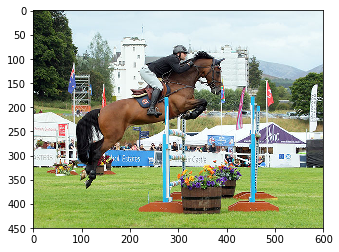

In [10]:
# Se visualiza la imagen a detectar
from PIL import Image
imagen='images/example_03.jpg'
original=Image.open(imagen)
plt.imshow(original)

*Se carga la imagen con la que se trabajará en este caso agregue una personal*

In [11]:
# load the input image and construct an input blob for the image
# by resizing to a fixed 300x300 pixels and then normalizing it
# (note: normalization is done via the authors of the MobileNet SSD
# implementation)
image = cv2.imread(imagen)
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 0.007843,(300, 300), 127.5)

*Se realiza el procesamiento de la imagen y su detección*

In [12]:
# pass the blob through the network and obtain the detections and
# predictions
net.setInput(blob)
detections = net.forward()
    print("Resultado de la detección:")
# loop over the detections
for i in np.arange(0, detections.shape[2]):
    # extract the confidence (i.e., probability) associated with the
    # prediction
    confidence = detections[0, 0, i, 2]

    # filter out weak detections by ensuring the `confidence` is
    # greater than the minimum confidence
    if confidence > 0.2:
        # extract the index of the class label from the `detections`,
        # then compute the (x, y)-coordinates of the bounding box for
        # the object
        idx = int(detections[0, 0, i, 1])
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")

        # display the prediction
        label = "{}: {:.2f}%".format(CLASSES[idx], confidence * 100)
        print("[INFO] {}".format(label))
        cv2.rectangle(image, (startX, startY), (endX, endY),
            COLORS[idx], 2)
        y = startY - 15 if startY - 15 > 15 else startY + 15
        cv2.putText(image, label, (startX, y),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[idx], 2)

IndentationError: unexpected indent (<ipython-input-12-18505c4ab6cc>, line 5)

In [ ]:
#Se muestra la imágen, con los objetos categorizados
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,8))
fig.suptitle('Resultados de la imagen original y sus objetos detectados')

original=Image.open(imagen)
ax1.imshow(original.rotate(-90))
ax1.legend(loc='best')
ax1.set_title("Imagen original")

ax2.imshow(image)
ax2.legend(loc='best')
ax2.set_title("Imagen con detección de objetos")
